In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(data)
rows, column = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:column]
X_dev = X_dev / 255.

data_train = data[1000:rows].T
Y_train = data_train[0]
X_train = data_train[1:column]
X_train = X_train / 128.
_,m_train = X_train.shape

In [8]:
X_train[:,0].shape

(784,)

In [9]:
Y_train

array([9, 0, 1, ..., 7, 5, 0], dtype=int64)

In [10]:
def InitiateParameters():
    W1 = np.random.rand(10, 784)
    b1 = np.random.rand(10, 1)
    W2 = np.random.rand(10, 10)
    b2 = np.random.rand(10, 1)
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

#activation function based on probabilities
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z))
    return A

def ForwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#used when we are in back propagation
def ReLUDeriv(Z):
    return Z > 0

def OneHot(Y):
    OneHotY = np.zeros((Y.size, Y.max() + 1))
    OneHotY[np.arange(Y.size), Y] = 1
    OneHotY = OneHotY.T
    return OneHotY

def BackwardPropagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    #encode first
    OneHotY = OneHot(Y)
    dZ2 = A2 - OneHotY
    dW2 = 1 / rows * dZ2.dot(A1.T)
    db2 = 1 / rows * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLUDeriv(Z1)
    dW1 = 1 / rows * dZ1.dot(X.T)
    db1 = 1 / rows * np.sum(dZ1)
    return dW1, db1, dW2, db2

def UpdateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def GetAccuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def GradientDescent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = InitiateParameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = ForwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = BackwardPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = UpdateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(GetAccuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = GradientDescent(X_train, Y_train, 0.10, 500)

C:\Users\haris\AppData\Local\Temp\ipykernel_16864\2518096606.py:13: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / np.sum(np.exp(Z))
C:\Users\haris\AppData\Local\Temp\ipykernel_16864\2518096606.py:13: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / np.sum(np.exp(Z))


Iteration:  0
[0 3 0 ... 3 0 0] [9 0 1 ... 7 5 0]
0.07380487804878048
Iteration:  10
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  20
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  30
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  40
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  50
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  60
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  70
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  80
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  90
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  100
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  110
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  120
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Iteration:  130
[0 0 0 ... 0 0 0] [9 0 1 ... 7 5 0]
0.09875609756097561
Ite

In [13]:
def MakePredictions(X, W1, b1, W2, b2):
    _, _, _, A2 = ForwardPropagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def TestPrediciton(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = MakePredictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


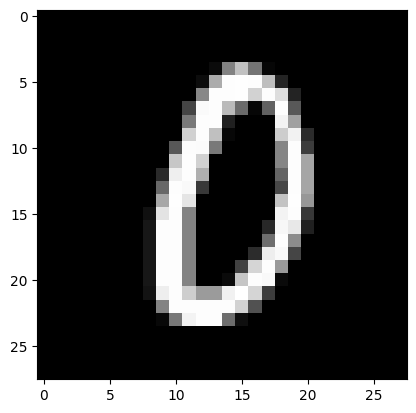

Prediction:  [0]
Label:  0


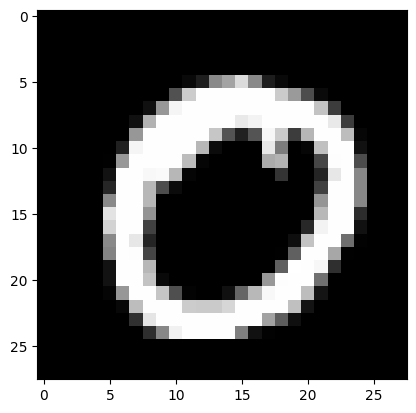

Prediction:  [0]
Label:  4


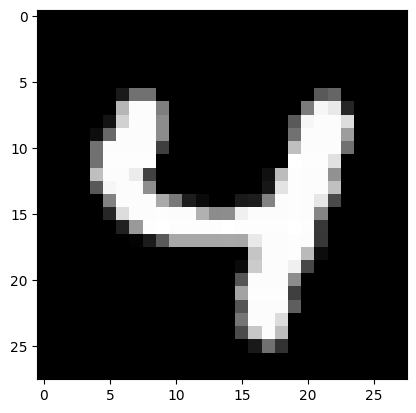

Prediction:  [0]
Label:  4


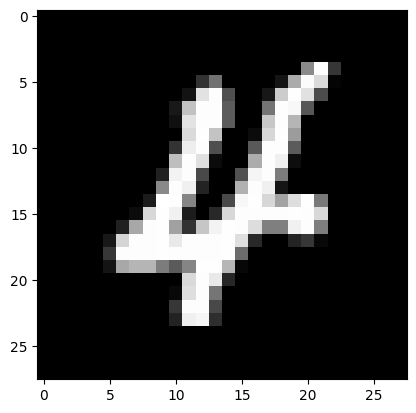

Prediction:  [0]
Label:  4


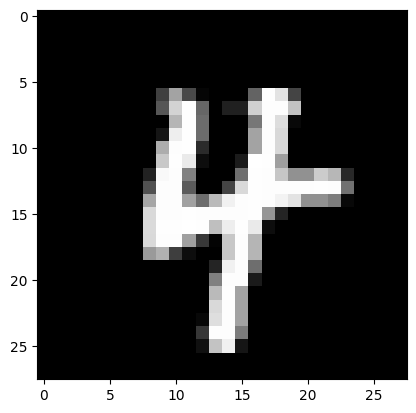

Prediction:  [0]
Label:  4


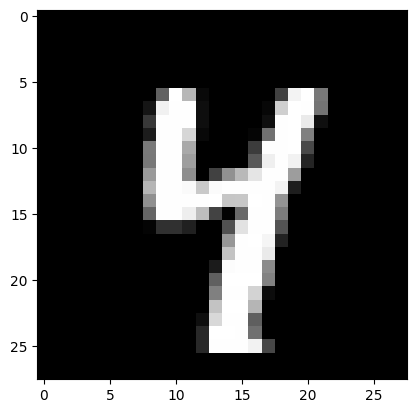

Prediction:  [0]
Label:  6


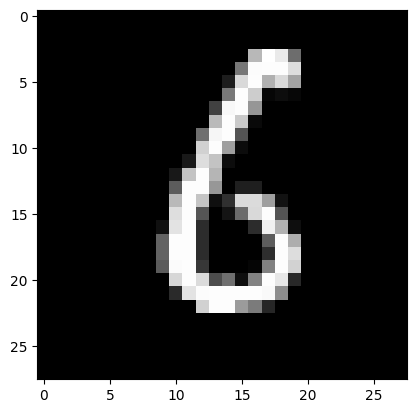

Prediction:  [0]
Label:  7


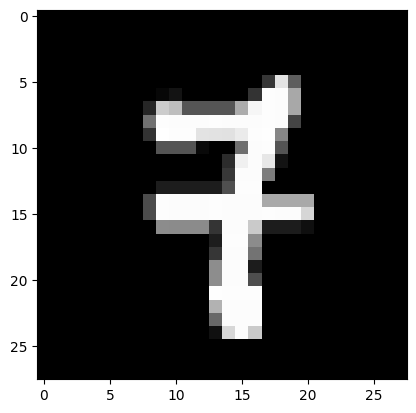

Prediction:  [0]
Label:  1


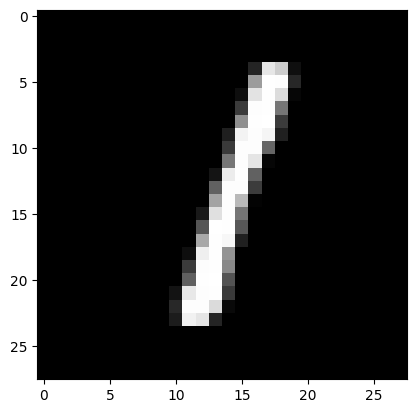

Prediction:  [0]
Label:  0


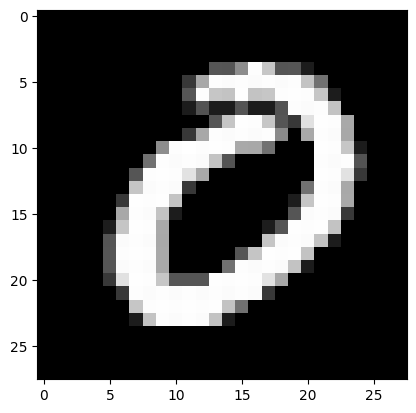

In [14]:
TestPrediciton(10, W1, b1, W2, b2)
TestPrediciton(1, W1, b1, W2, b2)
TestPrediciton(58, W1, b1, W2, b2)
TestPrediciton(125, W1, b1, W2, b2)
TestPrediciton(30, W1, b1, W2, b2)
TestPrediciton(106, W1, b1, W2, b2)
TestPrediciton(89, W1, b1, W2, b2)
TestPrediciton(52, W1, b1, W2, b2)
TestPrediciton(19, W1, b1, W2, b2)
TestPrediciton(65, W1, b1, W2, b2)

In [22]:
dev_predictions = MakePredictions(X_dev, W1, b1, W2, b2)
GetAccuracy(dev_predictions, Y_dev)
acc= GetAccuracy(dev_predictions,Y_dev)*1000

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
print("Accuracy is "+str(acc)+" Percent")

Accuracy is 83.0Percent
